## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_metadata.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [70]:
# Checking the number of mice.

study_results_path = "data/Study_results.csv"# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how = 'left', on = ['Mouse ID'])# Display the data table for preview
mouse_study.head()# Checking the number of mice.



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_count = len(mouse_study["Mouse ID"].unique())


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 



In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study = mouse_study[mouse_study['Mouse ID'].isin(df)== False]
mouse_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice in the clean DataFrame.

mouse_study_count =  len(mouse_study["Mouse ID"].unique())
mouse_study_count
grouped_df = mouse_study.set_index('Drug Regimen').groupby(['Drug Regimen'])
grouped_df


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()
tumor_summary = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem,
})
tumor_summary.head()



# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [76]:
# This method produces everything in a single groupby function
summary_table = grouped_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_table.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

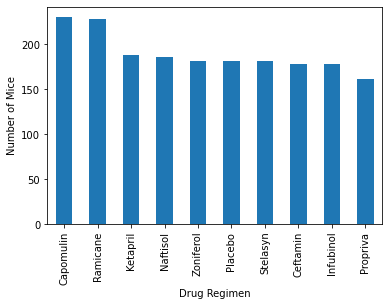

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Create a bar chart based off of the group series from before
drug_group = mouse_study.groupby('Drug Regimen')
# Count how many times each maker appears in our group
count_mice = drug_group['Drug Regimen'].count()
count_mice
hope_this_works = mouse_study["Drug Regimen"].value_counts()
hope_this_works
count_again = hope_this_works.plot(kind='bar')
# Set the xlabel and ylabel using class methods
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

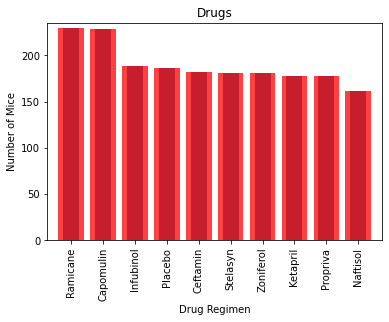

In [78]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create a bar chart based off of the group series from before
drug_group = mouse_study.groupby('Drug Regimen')
# Count how many times each maker appears in our group
count_mice = drug_group['Drug Regimen'].count()
count_mice
hope_this_works = mouse_study["Drug Regimen"].value_counts()
hope_this_works
count_again = hope_this_works.plot(kind='bar')

drug_count =  mouse_study["Drug Regimen"].unique()
drug_count
drugs = drug_count
mice = hope_this_works
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(mice) + 5)
plt.bar(x_axis, mice, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation= 90)
plt.show()


In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mouse_study.groupby('Sex')
sex_group
count_sex = sex_group['Sex'].count()
count_sex

Sex
Female    935
Male      958
Name: Sex, dtype: int64

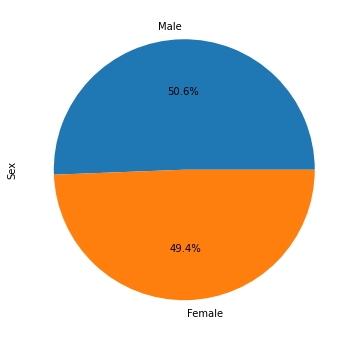

In [80]:
count_sex1 = mouse_study['Sex'].value_counts()
count_sex1
# Labels for the sections of our pie chart
sex_plot = count_sex1.plot(kind='pie', subplots=True, figsize=(11, 6), autopct='%1.1f%%')

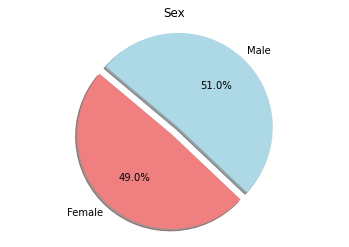

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
# The values of each section of the pie chart
count = [922, 958]
# The colors of each section of the pie chart
colors = ["lightcoral", "lightblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.title("Sex")
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(count, explode=explode, labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [82]:
#Code for instructor
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mouse_study.loc[mouse_study["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


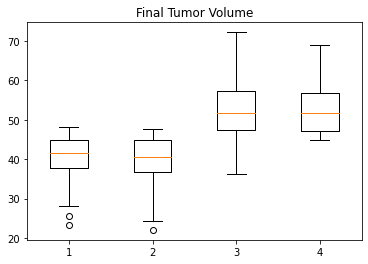

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

In [84]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse = mouse_study.loc[mouse_study["Drug Regimen"] == 'Capomulin', 'Mouse ID']
capomulin_mouse

10      s185
11      s185
12      s185
13      s185
14      s185
        ... 
440     i557
1452    r157
1453    r157
1454    r157
1455    r157
Name: Mouse ID, Length: 230, dtype: object

In [85]:
capomulin_volume = mouse_study.loc[mouse_study["Mouse ID"] == 'r157', ['Tumor Volume (mm3)', "Timepoint"]]
capomulin_volume

,Tumor Volume (mm3),Timepoint
1452,45.000000,0
1453,45.597064,5
1454,46.059608,10
1455,46.539206,15


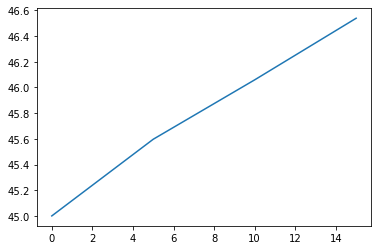

In [86]:
x_axis = capomulin_volume["Tumor Volume (mm3)"]
y_axis = capomulin_volume["Timepoint"]
# Plot the line
plt.plot(y_axis, x_axis)
plt.show()

In [87]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = mouse_study.loc[mouse_study["Drug Regimen"] == 'Capomulin', ['Weight (g)', "Tumor Volume (mm3)", "Mouse ID"]]
mean_1 = weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_1 = weight.groupby("Mouse ID")["Weight (g)"].max()

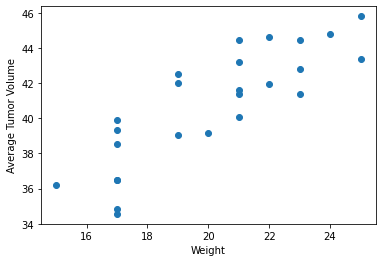

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = weight_1
y_values = mean_1
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


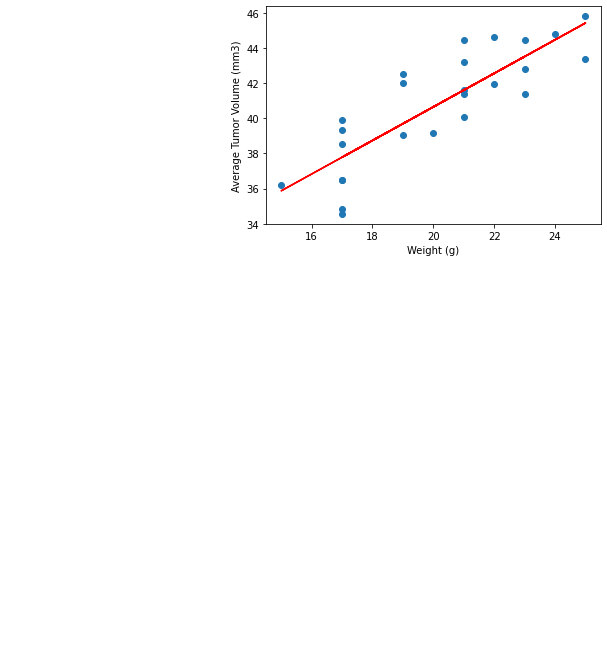

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_1,mean_1)
plt.scatter(weight_1,mean_1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()